In [2]:
import numpy as np
import os
from os import path
import matplotlib.pyplot as plt
import sys
import scipy
from scipy.signal import find_peaks, peak_prominences, find_peaks_cwt, peak_widths
data_loc = '/project/wyin/jlee/ml-project/inverse-shifted/data'
util_loc = '/project/wyin/jlee/ml-project/utils'
sys.path.append(util_loc)
from utilities import UnscaledData

In [35]:
#Returns location of cutoff point
omega = np.linspace(-4.36, 9.76, 354)
def mn_loc(dos):
    peaks, _ = find_peaks(dos)
    proms = peak_prominences(dos, peaks)[0]
    pairs = zip(proms, peaks)
    pairs = sorted(pairs, key = lambda x: x[0], reverse = True)

    first_prom, first_peak = pairs[0]
    second_prom, second_peak = (0, 0)
    for prom, peak in pairs[1:]:

        if peak > first_peak and prom > second_prom:
            second_prom = prom
            second_peak = peak
            
    mn = np.argmin(dos[first_peak:second_peak])
    
    return first_peak + mn

def lorentzian(x, x0, amp, width):
    return amp * width ** 2 / ((x - x0) ** 2 + width ** 2)

def fit_lorentzian(dos):
    cutoff = mn_loc(dos)
    truncated_dos = dos[:cutoff + 1]
    truncated_omega = omega[:cutoff + 1]
    params, _ = scipy.optimize.curve_fit(lorentzian, truncated_omega, truncated_dos)

#     plt.figure(figsize = (15, 5))
#     plt.plot(truncated_omega, lorentzian(truncated_omega, *params))
#     plt.plot(truncated_omega, truncated_dos)
    params[2] = abs(params[2])
    return params

In [36]:
data = UnscaledData(data_loc, X_name = "dos", y_name = "params")

params_arr = []
l_params_arr = []
for i, dos in enumerate(data.train_X):
    params_arr.append(data.train_y[i])
    l_params_arr.append(fit_lorentzian(dos))
    
    if i % 10000 == 0:
        print(f"step {i} done")
    
params_arr = np.array(params_arr)
l_params_arr = np.array(l_params_arr)

step 0 done
step 10000 done
step 20000 done


In [55]:
np.savez("data/train-set", params = params_arr, l_params = l_params_arr)

In [58]:
params_arr = []
l_params_arr = []
for i, dos in enumerate(data.val_X):
    params_arr.append(data.val_y[i])
    l_params_arr.append(fit_lorentzian(dos))
    
    if i % 10000 == 0:
        print(f"step {i} done")
    
params_arr = np.array(params_arr)
l_params_arr = np.array(l_params_arr)
print(l_params_arr.shape)
print(params_arr.shape)
np.savez("data/val-set", params = params_arr, l_params = l_params_arr)

step 0 done
(3103, 3)
(3103, 3)


In [59]:
params_arr = []
l_params_arr = []
for i, dos in enumerate(data.test_X):
    params_arr.append(data.test_y[i])
    l_params_arr.append(fit_lorentzian(dos))
    
    if i % 10000 == 0:
        print(f"step {i} done")
    
params_arr = np.array(params_arr)
l_params_arr = np.array(l_params_arr)
print(l_params_arr.shape)
print(params_arr.shape)
np.savez("data/test-set", params = params_arr, l_params = l_params_arr)

step 0 done
(3238, 3)
(3238, 3)


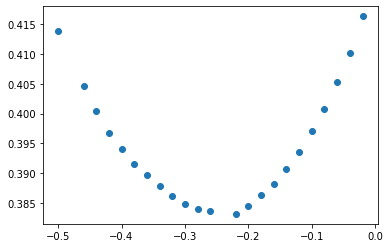

In [51]:
t1_arr = []
x0_arr = []
for i, params in enumerate(params_arr):
    if params[1] == 0.2 and params[2] == 0.296:
        t1_arr.append(params[0])
        x0_arr.append(l_params_arr[i][1])
        
plt.scatter(t1_arr, x0_arr)